## Como usar o Pandas e Scikit-learn para analisar base de dados

- Competição do Kaggle com dataframe "Titanic"

### Bibliotecas

- Pandas
- Sklearn
- Numpy
- Seaborn
- Matplotlib -> pyplot

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_treino = pd.read_csv('dados/titanic/train.csv')
df_teste = pd.read_csv('dados/titanic/test.csv')

In [4]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
# Para pedir ajuda
?pd.read_csv

Object `read_csv` not found.


In [11]:
# Exibe os 5 ultimos registros
df_treino.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [12]:
df_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_treino.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [20]:
# Número de linhas que será visualizado no Pandas
pd.options.display.max_rows

60

In [21]:
# Mudar a quantidade de linhas que o Pandas exibe
pd.options.display.max_rows = 15

In [57]:
Pclass = df_treino['Pclass']#.append(df_treino['Survived'])

In [63]:
df_treino.iloc[0]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [74]:
# Converte para int64 - não converte se a coluna tiver valores NaN
df_treino['Age']astype('int64')

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [73]:
# Tipos de dados
df_treino.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [79]:
#df_treino.drop(df_treino['Age'].isnull())
df_treino['Age'].isnull().sum()

177

In [87]:

df_treino['Age'] = df_treino['Age'].repleace(df_treino['Age'].isnull(), df_treino['Age'].mean())

AttributeError: 'Series' object has no attribute 'repleace'

In [85]:
# If condicional - if ternario

x = 1
print ("par" if x % 2 == 0 else "impar")

impar


In [118]:
# linhas, coluna - negativo trás ordem decrescente
df_treino.iloc[-10, 3]

# iloc retorna o 'valor' do indice de uma coluna de uma determinada 'linha'
# iloc[linha, index]
df_treino.iloc[10, 3]

# loc retorna o 'valor' da coluna de uma determinada 'linha'
# loc[linha, coluna]
df_treino.loc[10, 'Name']

Object `df_treino.iloc[-3:, 3]` not found.


In [128]:
df_treino.loc[20, ['Name', 'Age']]

Name    Fynney, Mr. Joseph J
Age                       35
Name: 20, dtype: object

In [130]:
# Mostra quantidade de valores diferentes
df_treino['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [133]:
sexo = {'male': 0, 'female': 1}
df_treino['sexo_int'] = df_treino['Sex'].map(sexo)

In [134]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexo_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [137]:
# Retorna a porcentagem dos valores diferentes
df_treino['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

In [138]:
embarque_int = {'S': 1, 'C': 2, 'Q': 3}
df_treino['embarque_int'] = df_treino['Embarked'].map(embarque_int)

In [139]:
df_treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sexo_int,embarque_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1.0


In [145]:
# Exibe a quantidade de valores incluindo os NULL
df_treino['embarque_int'].value_counts(dropna = False)

# Exibe a porcentagem de valores diferentes incluindo os NULL
df_treino['embarque_int'].value_counts(normalize = True, dropna = False)

1.0    0.722783
2.0    0.188552
3.0    0.086420
NaN    0.002245
Name: embarque_int, dtype: float64

In [149]:
# Inserir 0 (zero) quando for NULL
df_treino['embarque_int'] = df_treino['embarque_int'].fillna(0)

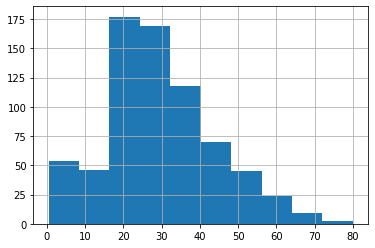

In [151]:
df_treino['Age'].hist()

In [159]:
# Quantidade de valores NULL
df_treino['Age'].isnull().sum()

177

In [161]:
# Media de idade por classe
idade_median = df_treino.pivot_table('Age', index='Pclass', aggfunc='median')

In [162]:
idade_median

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [164]:
df_treino['Age'] = df_treino[['Age', 'Pclass']].apply(lambda x: idade_median.loc[x['Pclass']].values[0] if pd.isnull(x['Age'])
                                              else x['Age'], axis = 1)

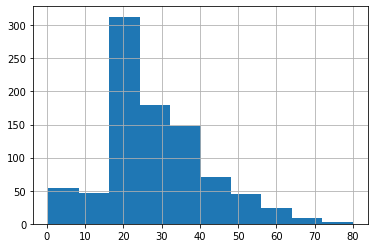

In [166]:
df_treino['Age'].hist();

In [167]:
df_treino['family'] = df_treino['SibSp'] + df_treino['Parch']
df_treino['family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family, dtype: int64

In [168]:
df_treino['socio'] = (df_treino['family'] + 1)*df_treino['Pclass']
df_treino['socio'].value_counts()

3     348
2     174
1     109
6      92
9      47
4      41
18     17
8      13
21     12
15     12
12     10
33      7
24      6
5       2
10      1
Name: socio, dtype: int64

In [173]:
df_treino['Cabin'].sample(15, random_state = 10)

590      NaN
131      NaN
628      NaN
195      B80
230      C83
646      NaN
75     F G73
586      NaN
569      NaN
287      NaN
666      NaN
43       NaN
600      NaN
284      A19
242      NaN
Name: Cabin, dtype: object

In [176]:
df_treino['Deck'] = df_treino['Cabin'].apply(lambda x : x if isinstance(x, float) else x[0])
df_treino['Deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Deck, dtype: int64

In [179]:
df_treino['Deck'] = np.where(df_treino['Deck'].isin(['A', 'F', 'G', 'T']), 'other', df_treino['Deck'])
deck_dummies = pd.get_dummies(df_treino['Deck'], prefix = 'Deck')
deck_dummies.head()

,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,1,0,0,0
4,0,0,0,0,0


In [181]:
df_treino = pd.concat([df_treino, deck_dummies], axis = 1)

In [188]:
to_drop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'Deck']

In [192]:
df_treino = df_treino.drop(to_drop, axis = 1)
df_treino.shape

KeyError: "['Name' 'Ticket' 'Cabin' 'Sex' 'Embarked' 'Deck'] not found in axis"

In [197]:
df_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'sexo_int', 'embarque_int', 'family', 'socio', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_other'],
      dtype='object')

In [199]:
to_list = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'sexo_int', 'embarque_int', 'family', 'socio', 'Deck_B', 'Deck_C',
       'Deck_D', 'Deck_E', 'Deck_other', 'Survived']

In [200]:
df_treino = df_treino[to_list]

In [201]:
df_treino

,PassengerId,Pclass,Age,SibSp,Parch,Fare,sexo_int,embarque_int,family,socio,Deck_B,Deck_C,Deck_D,Deck_E,Deck_other,Survived
0,1,3,22.0,1,0,7.2500,0,1.0,1,6,0,0,0,0,0,0
1,2,1,38.0,1,0,71.2833,1,2.0,1,2,0,1,0,0,0,1
2,3,3,26.0,0,0,7.9250,1,1.0,0,3,0,0,0,0,0,1
3,4,1,35.0,1,0,53.1000,1,1.0,1,2,0,1,0,0,0,1
4,5,3,35.0,0,0,8.0500,0,1.0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1.0,0,2,0,0,0,0,0,0
887,888,1,19.0,0,0,30.0000,1,1.0,0,1,1,0,0,0,0,1
888,889,3,24.0,1,2,23.4500,1,1.0,3,12,0,0,0,0,0,0
889,890,1,26.0,0,0,30.0000,0,2.0,0,1,0,1,0,0,0,1


In [202]:
corr = df_treino.corr()

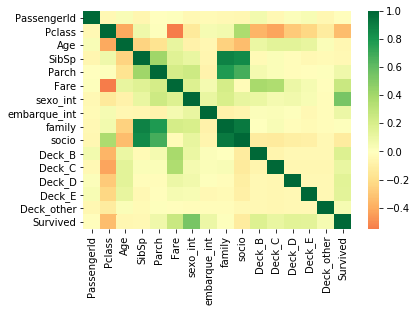

In [203]:
sns.heatmap(corr, center = 0, cmap = 'RdYlGn');

In [204]:
df_treino[['family', 'socio', 'SibSp', 'Parch']].corr()

,family,socio,SibSp,Parch
family,1.000000,0.925814,0.890712,0.783111
socio,0.925814,1.000000,0.854492,0.684167
SibSp,0.890712,0.854492,1.000000,0.414838
Parch,0.783111,0.684167,0.414838,1.000000


In [206]:
df_treino.to_csv('my_titanic.csv')